In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dask.dataframe as dd
from matplotlib import rcParams

# Load Data

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
loan = pd.read_csv('/content/drive/My Drive/loan_data_2007_2014.csv')
loan

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-31-980299d4678d>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('/content/drive/My Drive/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [ ]:
#count issue_d from loan
loan['issue_d'].value_counts()

,count
issue_d,
Oct-14,38782
Jul-14,29306
Nov-14,25054
May-14,19099
Apr-14,19071
...,...
Aug-07,74
Jul-07,63
Sep-08,57


# Data Understanding

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
#Check missing values on loan and show all columns
missing_values = loan.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m  

In [ ]:
#Check duplicated data
loan.duplicated().sum()

0

# Data Cleansing

Ubah data loan menjadi loan_data untuk antisipasi runtime dan kehilangan data

In [ ]:
loan_data = loan
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Kolom yang tidak ada data sudah dipastikan tidak dipakai untuk perhitungan model, jadi dihapus saja

In [ ]:
#Delete Column with 0 non-null in loan
loan_data = loan.dropna(axis=1, how='all')
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Kolom yang memiliki banyak identifiers juga akan membuat sulit perhitungan korelasi sehingga lebih baik dihapus, namun ada Zip Code yang mempunyai pattern tersendiri sehingga nanti Zip Code dibiarkan untuk di analisa dulu di EDA

In [ ]:
#Delete Columns with unique identifiers data
loan_data = loan_data.drop(['id', 'member_id', 'url', 'desc', 'title', 'Unnamed: 0'], axis=1)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

Kolom yang memiliki 1 jenis kategori juga dihapus agar lebih efisien dalam perhitungan model

In [ ]:
#Check column with unique identifiers data
unique_values = loan_data.nunique()
unique_values[unique_values == 1]

,0
policy_code,1
application_type,1


In [ ]:
# Find columns with only one unique value
unique_value_counts = loan_data.nunique()
columns_to_drop = unique_value_counts[unique_value_counts == 1].index

# Drop these columns from the DataFrame
loan_data = loan_data.drop(columns=columns_to_drop)

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

Beberapa kolom data ada yang salah tipe data nya sehingga di convert dulu agar lebih mudah dalam mengkategorikan data category dan data numerical

In [ ]:
#Change date column type
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y', errors='coerce')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y', errors='coerce')
loan_data['last_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y', errors='coerce')
loan_data['last_credit_pull_d'] = pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y', errors='coerce')
loan_data['next_pymnt_d'] = pd.to_datetime(loan_data['next_pymnt_d'], format='%b-%y', errors='coerce')

#Clear the last two digits from zip_code column and change the type to string
loan_data['zip_code'] = loan_data['zip_code'].apply(lambda x: x[:-2] if isinstance(x, str) else x)

#Convert zip_code to string
loan_data['zip_code'] = loan_data['zip_code'].astype(str)

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   term                         466285 non-null  object        
 4   int_rate                     466285 non-null  float64       
 5   installment                  466285 non-null  float64       
 6   grade                        466285 non-null  object        
 7   sub_grade                    466285 non-null  object        
 8   emp_title                    438697 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 11  annual_inc                

Memastikan kembali adakah kolom yang 50% isinya kosong, dan lebih baik dihapus agar tetap mempertahankan keaslian data

In [ ]:
# Calculate the percentage of missing values per column
# Exclude columns with datetime data type
non_date_columns = loan_data.select_dtypes(exclude=['datetime']).columns

# Calculate the percentage of missing values for non-date columns
missing_percentage = loan_data[non_date_columns].isnull().mean()

# Identify columns with more than 50% missing values
columns_to_check = missing_percentage[missing_percentage > 0.5]

# Display columns with their missing value percentages
print("Columns with more than 50% missing values:")
print(columns_to_check)

#Delete columns_to_check in loan_data
loan_data = loan_data.drop(columns=columns_to_check.index)

Columns with more than 50% missing values:
mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
dtype: float64


Cek kembali melalui info dan describe

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   466285 non-null  int64         
 1   funded_amnt                 466285 non-null  int64         
 2   funded_amnt_inv             466285 non-null  float64       
 3   term                        466285 non-null  object        
 4   int_rate                    466285 non-null  float64       
 5   installment                 466285 non-null  float64       
 6   grade                       466285 non-null  object        
 7   sub_grade                   466285 non-null  object        
 8   emp_title                   438697 non-null  object        
 9   emp_length                  445277 non-null  object        
 10  home_ownership              466285 non-null  object        
 11  annual_inc                  466281 non-

In [ ]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285,466285.000000,466256.000000,466256,...,466285.000000,465909,466285.000000,239071,466243,466140.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,2013-08-23 15:33:29.494623232,17.218758,0.284678,1997-12-16 11:57:43.058920192,...,8.961534,2015-04-23 05:05:48.379619584,3123.913796,2016-01-09 10:57:21.631983872,2015-08-30 16:56:26.436685824,0.009085,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,2007-06-01 00:00:00,0.000000,0.000000,1969-01-01 00:00:00,...,0.000000,2007-12-01 00:00:00,0.000000,2007-12-01 00:00:00,2007-05-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,2013-03-01 00:00:00,11.360000,0.000000,1994-03-01 00:00:00,...,0.000000,2015-01-01 00:00:00,312.620000,2016-02-01 00:00:00,2015-11-01 00:00:00,0.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,2014-01-01 00:00:00,16.870000,0.000000,1999-03-01 00:00:00,...,0.000000,2015-12-01 00:00:00,545.960000,2016-02-01 00:00:00,2016-01-01 00:00:00,0.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,2014-07-01 00:00:00,22.780000,0.000000,2002-09-01 00:00:00,...,0.000000,2016-01-01 00:00:00,3187.510000,2016-02-01 00:00:00,2016-01-01 00:00:00,0.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,2014-12-01 00:00:00,39.990000,29.000000,2068-12-01 00:00:00,...,7002.190000,2016-01-01 00:00:00,36234.440000,2016-03-01 00:00:00,2016-01-01 00:00:00,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,NaN,7.851121,0.797365,NaN,...,85.491437,NaN,5554.737393,NaN,NaN,0.108648,0.068637,1.463021e+04,1.521147e+05,3.724713e+04


Agar analisa lebih tajam saat EDA, langsung dibuat Target nasabah yang memiliki riwayat pinjaman yang baik (dengan nilai 1) dan yang buruk (dengan nilai 0) berdasarkan loan_status dan di cek berdasarkan riwayat waktu pinjaman

In [ ]:
#Check unique values in loan_status and group by terms
pd.set_option('display.max_colwidth', None)
loan_data.groupby('term')['loan_status'].unique()

,loan_status
term,
36 months,"[Fully Paid, Charged Off, Does not meet the credit policy. Status:Fully Paid, Does not meet the credit policy. Status:Charged Off, Current, Late (31-120 days), In Grace Period, Late (16-30 days), Default]"
60 months,"[Charged Off, Current, Fully Paid, Default, Late (31-120 days), In Grace Period, Late (16-30 days), Does not meet the credit policy. Status:Fully Paid, Does not meet the credit policy. Status:Charged Off]"


Penjelasan status-status dalam loan_status dan diurutkan berdasarkan waktu pinjaman:
1. Current
- Artinya:
Pinjaman masih sedang berlangsung
- Konteks:
Peminjam membayar pinjaman tepat waktu dan tidak ada pembayaran yang terlewat.

2. Fully Paid
- Artinya:
Pinjaman ini sudah dibayar lunas oleh peminjam sesuai dengan jadwal yang disepakati.
- Konteks:
Tidak ada masalah dengan pembayaran, dan pinjaman ini dianggap berhasil dilunasi sepenuhnya tanpa keterlambatan atau masalah lainnya.


3. In Grace Period
- Artinya:
Pinjaman masih dalam periode tenggang, yang artinya peminjam memiliki tambahan waktu untuk melakukan pembayaran tanpa dikenakan penalti lebih lanjut.
- Konteks:
Biasanya terjadi setelah peminjam terlambat beberapa hari, dan pemberi pinjaman memberikan kelonggaran waktu tambahan untuk membayar sebelum statusnya berubah menjadi "late."


4. Late (16-30 days)
- Artinya:
Pinjaman terlambat antara 16 hingga 30 hari.
- Konteks:
Pinjaman berada dalam periode keterlambatan yang relatif singkat, dan peminjam mungkin dikenakan biaya keterlambatan atau peringatan.

5. Late (31-120 days)
- Artinya:
Pinjaman terlambat pembayaran antara 31 hingga 120 hari.
- Konteks:
Peminjam belum membayar sesuai jadwal, tetapi belum cukup lama untuk dianggap sebagai "charged off."
Dampak bagi peminjam:
Terlambat dalam pembayaran akan mempengaruhi skor kredit, dan peminjam mungkin dikenakan biaya keterlambatan.
Pemberi pinjaman mungkin mulai melakukan upaya untuk menagih pembayaran.

6. Charged Off
- Artinya:
Pinjaman ini dianggap tidak dapat ditagih lagi oleh pemberi pinjaman karena peminjam tidak dapat atau tidak mau membayar dalam waktu yang lama.
- Konteks:
Biasanya terjadi setelah 60 hari keterlambatan pembayaran. Setelah periode ini, pemberi pinjaman biasanya menganggap pinjaman tersebut sebagai kerugian dan menulisnya dalam pembukuan mereka sebagai "charged off".

7. Default
- Artinya:
Pinjaman sudah gagal bayar total, sering kali karena peminjam tidak membayar dalam jangka waktu yang sangat lama.
- Konteks:
Peminjam tidak mampu atau tidak mau membayar sama sekali, dan pemberi pinjaman akhirnya menandai pinjaman tersebut sebagai gagal bayar.
Dampak bagi peminjam:
Seringkali mengarah pada penagihan oleh kolektor utang.
Peminjam akan kesulitan untuk mendapatkan pinjaman baru dengan lembaga pemberi pinjaman mana pun, dan skor kredit mereka akan turun secara signifikan

8. Does not meet the credit policy. Status: Fully Paid
- Artinya:
Pinjaman diberikan meskipun tidak memenuhi kebijakan kredit yang berlaku. Dengan kata lain, pinjaman ini diberikan kepada peminjam yang tidak memenuhi seluruh kriteria yang biasanya ditetapkan oleh lembaga pemberi pinjaman, misalnya skor kredit yang rendah atau pendapatan yang tidak cukup.
Namun, pinjaman ini pada akhirnya dibayar lunas oleh peminjam.
- Konteks dan Penyebab:
Keputusan manual atau pengecualian: Meskipun tidak memenuhi syarat secara otomatis menurut kebijakan standar (misalnya karena masalah pada skor kredit atau penghasilan), pemberi pinjaman mungkin membuat pengecualian berdasarkan alasan tertentu (misalnya, alasan pribadi atau jaminan lainnya).
Perubahan kebijakan kredit: Pemberi pinjaman bisa jadi memperbarui kebijakan kredit mereka untuk memberikan pinjaman kepada lebih banyak orang, meskipun sebelumnya tidak memenuhi kriteria.
Pinjaman disetujui dengan pertimbangan risiko: Misalnya, jika peminjam menunjukkan potensi pendapatan yang akan datang atau memiliki jaminan yang sangat kuat, pinjaman tetap diberikan meskipun ada kekurangan dalam evaluasi standar.
Dampak bagi peminjam:
Peminjam ini mampu melunasi pinjaman meskipun dalam kondisi awal dianggap berisiko.
Pinjaman ini tidak menciptakan masalah di masa depan karena berhasil dibayar penuh.
Pemberi pinjaman bisa mencatatnya sebagai pinjaman yang berisiko lebih tinggi karena diluar kebijakan kredit, meskipun berhasil dilunasi.

9. Does not meet the credit policy. Status: Charged Off
- Artinya:
Pinjaman tidak memenuhi kebijakan kredit yang berlaku pada awalnya.
Pinjaman ini dianggap gagal bayar dan kemudian ditulis sebagai "charged off" oleh pemberi pinjaman. Artinya, pemberi pinjaman sudah menyerah untuk mencoba menagih pinjaman ini setelah gagal bayar dalam waktu yang lama (misalnya lebih dari 180 hari).
- Konteks dan Penyebab:
Tidak ada pembayaran atau sangat terlambat: Peminjam tidak dapat melunasi pinjaman meskipun sudah diberikan waktu tambahan. Pemberi pinjaman menganggap bahwa peminjam sudah tidak mampu membayar.
Pinjaman dianggap berisiko tinggi sejak awal: Kebijakan kredit yang tidak dipenuhi bisa jadi menunjukkan risiko yang lebih besar. Peminjam mungkin memiliki riwayat kredit yang buruk atau kondisi keuangan yang tidak stabil.
Sistem penagihan gagal atau diabaikan: Setelah beberapa bulan atau lebih, pemberi pinjaman mungkin merasa bahwa penagihan tidak efektif, dan akhirnya mencatat pinjaman ini sebagai kerugian dalam pembukuan mereka.


Ada kejanggalan pada status current, namun karena status peminjam masih berlangsung artinya bisa jadi peminjam dianggap memiliki status yg baik sehingga diberikan pinjaman lagi, atau peminjam baru berlangsung 1x pinjaman, oleh karena itu current akan tidak dikategorikan kedalam perhitungan dulu

sehingga nasaabah dianggap memiliki kredibilitas yang baik jika melewati tahap 2,3,4,9

In [ ]:
#Make new column to categorize the good credibility without applying 'current' category
loan_data['credible'] = loan_data['loan_status'].apply(
    lambda x: 1 if x in ['Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid', 'Late (16-30 days)']
    else (0 if x in ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off'] else None)
)

In [ ]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credible
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,2015-01-01,171.62,NaT,2016-01-01,0.0,0.0,NaN,NaN,NaN,1.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,2013-04-01,119.66,NaT,2013-09-01,0.0,0.0,NaN,NaN,NaN,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,2014-06-01,649.91,NaT,2016-01-01,0.0,0.0,NaN,NaN,NaN,1.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,2015-01-01,357.48,NaT,2015-01-01,0.0,0.0,NaN,NaN,NaN,1.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
credible_counts = loan_data['credible'].value_counts()


In [ ]:
#Count loan status group by credible
loan_data.groupby('credible')['loan_status'].value_counts()

credible  loan_status                                        
0.0       Charged Off                                             42475
          Late (31-120 days)                                       6900
          Default                                                   832
          Does not meet the credit policy. Status:Charged Off       761
1.0       Fully Paid                                             184739
          In Grace Period                                          3146
          Does not meet the credit policy. Status:Fully Paid       1988
          Late (16-30 days)                                        1218
Name: count, dtype: int64

In [ ]:
credible_counts

,count
credible,
1.0,191091
0.0,50968


In [ ]:
#Check categorical and numerical columns and find if there are some miss
cats = loan_data.select_dtypes(include=['object']).columns
nums = loan_data.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", cats)
print("Numerical columns:", nums)

Categorical columns: Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'initial_list_status'],
      dtype='object')
Numerical columns: Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'credible'],
      dtype='object')


Ternyata term dan emp_length dianggap kategorikal padahal harusnya numerikal, maka diubah dulu

In [ ]:
# Remove the word 'months' and convert to numerical format
loan_data['term'] = loan_data['term'].str.replace(' months', '').astype(int)

# Define a mapping for emp_length categories to numerical values
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Apply the mapping to the 'emp_length' column
loan_data['emp_length'] = loan_data['emp_length'].replace(emp_length_mapping)

# Display the updated DataFrame
loan_data.head()

<ipython-input-52-9779002d26b1>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['emp_length'] = loan_data['emp_length'].replace(emp_length_mapping)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credible
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,...,2015-01-01,171.62,NaT,2016-01-01,0.0,0.0,NaN,NaN,NaN,1.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.0,...,2013-04-01,119.66,NaT,2013-09-01,0.0,0.0,NaN,NaN,NaN,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10.0,...,2014-06-01,649.91,NaT,2016-01-01,0.0,0.0,NaN,NaN,NaN,1.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,...,2015-01-01,357.48,NaT,2015-01-01,0.0,0.0,NaN,NaN,NaN,1.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,...,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
#Re-check categorical and numerical columns
cats = loan_data.select_dtypes(include=['object']).columns
nums = loan_data.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", cats)
print("Numerical columns:", nums)

Categorical columns: Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'zip_code', 'addr_state', 'initial_list_status'],
      dtype='object')
Numerical columns: Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'credible'],
      dtype='object')


In [ ]:
loan_data.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,27588
emp_length,21008


In [ ]:
#Export loan_data to csv
loan_data.to_csv('loan_data.csv', index=False)

In [ ]:
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credible
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.0,...,2015-01-01,171.62,NaT,2016-01-01,0.0,0.0,NaN,NaN,NaN,1.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.0,...,2013-04-01,119.66,NaT,2013-09-01,0.0,0.0,NaN,NaN,NaN,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10.0,...,2014-06-01,649.91,NaT,2016-01-01,0.0,0.0,NaN,NaN,NaN,1.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,...,2015-01-01,357.48,NaT,2015-01-01,0.0,0.0,NaN,NaN,NaN,1.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.0,...,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60,14.47,432.64,C,C2,Financial Advisor,4.0,...,2016-01-01,432.64,2016-02-01,2016-01-01,0.0,0.0,0.0,294998.0,29900.0,NaN
466281,22000,22000,22000.0,60,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10.0,...,2014-12-01,17.50,NaT,2016-01-01,0.0,0.0,0.0,221830.0,39400.0,0.0
466282,20700,20700,20700.0,60,16.99,514.34,D,D1,patrol,7.0,...,2016-01-01,514.34,2016-02-01,2015-12-01,0.0,0.0,0.0,73598.0,13100.0,NaN
466283,2000,2000,2000.0,36,7.90,62.59,A,A4,Server Engineer Lead,3.0,...,2014-12-01,1500.68,NaT,2015-04-01,0.0,0.0,0.0,591610.0,53100.0,1.0


# Insight and Recommendation

## Univariate Analysis pada tiap Fitur Kategorikal dan Numerikal

In [ ]:
import pandas as pd

# Univariate Analysis on categorical columns and display as tables
for col in cats:
    value_counts_df = pd.DataFrame(loan_data[col].value_counts()).reset_index()
    value_counts_df.columns = [col, 'Count']  # Rename columns for better readability
    print(f'Value Count Table for Column: {col}')
    print(value_counts_df)
    print()


Value Count Table for Column: grade
  grade   Count
0     B  136929
1     C  125293
2     D   76888
3     A   74867
4     E   35757
5     F   13229
6     G    3322

Value Count Table for Column: sub_grade
   sub_grade  Count
0         B3  31686
1         B4  30505
2         C1  26953
3         C2  26740
4         B2  26610
5         C3  25317
6         B5  25252
7         C4  24105
8         B1  22876
9         C5  22178
10        A5  21757
11        D1  19261
12        A4  19045
13        D2  17046
14        D3  14916
15        D4  14099
16        A3  12568
17        D5  11566
18        A2  10956
19        A1  10541
20        E1   9033
21        E2   8669
22        E3   6976
23        E4   5992
24        E5   5087
25        F1   3940
26        F2   3001
27        F3   2708
28        F4   2067
29        F5   1513
30        G1   1109
31        G2    823
32        G3    583
33        G4    422
34        G5    385

Value Count Table for Column: emp_title
                                em

In [ ]:
import pandas as pd
import plotly.express as px

purpose_data = loan_data['purpose'].value_counts().reset_index()
purpose_data.columns = ['purpose', 'count']

# Create a DataFrame for the bar plot
df = pd.DataFrame(purpose_data)


# Create the bar plot
fig = px.bar(
    df,
    x='purpose',
    y='count',
    text='count',  # Display counts on bars
    title='Distribution of Loan Purposes',
    labels={'purpose': 'Purpose of Loan', 'count': 'Number of Loans'},
    color='count',  # Use a gradient color scheme
    color_continuous_scale='Viridis'  # Choose a visually appealing color scale
)

# Customize aesthetics
fig.update_layout(
    title_font_size=20,
    title_font_family='Arial',
    xaxis_title='Purpose of Loan',
    yaxis_title='Number of Loans',
    xaxis_tickangle=-45,  # Tilt x-axis labels for readability
    template='plotly_white',  # Use a clean background template
    margin=dict(l=40, r=40, t=60, b=120),  # Adjust margins
    showlegend=False  # Hide legend for a single category
)

# Add hover labels and adjust text size
fig.update_traces(
    textposition='outside',
    textfont_size=12,
    hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
)

# Show the plot
fig.show()


Untuk melihat karakteristik peminjam, kita lihat dari tujuannya. Debt consolidation dan credit card menonjol, menandakan bahwa mayoritas pinjaman digunakan untuk pengelolaan hutang pribadi. Segmen seperti energi terbarukan dan pendidikan memiliki potensi untuk berkembang, terutama jika diberikan insentif atau program khusus.

In [ ]:
import pandas as pd
import plotly.express as px

# Get value counts for 'addr_state' and reset index
state_data = loan_data['addr_state'].value_counts().reset_index()
state_data.columns = ['addr_state', 'count']

# Take the top 10 states only
top_state_data = state_data.nlargest(10, 'count')

# Create a DataFrame for the bar plot
df = pd.DataFrame(top_state_data)

# Create the bar plot
fig = px.bar(
    df,
    x='addr_state',
    y='count',
    text='count',  # Display counts on bars
    title='Top 10 States by Number of Loan Applicants',
    labels={'addr_state': 'State', 'count': 'Number of Loans'},
    color='count',  # Use a gradient color scheme
    color_continuous_scale='Plasma'  # Choose a new color scale
)

# Customize aesthetics
fig.update_layout(
    title_font_size=20,
    title_font_family='Arial',
    xaxis_title='State',
    yaxis_title='Number of Loans',
    xaxis_tickangle=-45,  # Tilt x-axis labels for readability
    template='plotly_white',  # Use a clean background template
    margin=dict(l=40, r=40, t=60, b=120),  # Adjust margins
    showlegend=False  # Hide legend for a single category
)

# Add hover labels and adjust text size
fig.update_traces(
    textposition='outside',
    textfont_size=12,
    hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
)

# Show the plot
fig.show()


California (CA) memiliki jumlah peminjam tertinggi (71.450), jauh melebihi negara bagian lainnya. Setelah California, New York (NY) dan Texas (TX) menempati posisi kedua dan ketiga dengan masing-masing 40.242 dan 36.439 peminjam. Ini menunjukkan potensi pasar yang cukup besar di kedua negara bagian tersebut, meskipun masih jauh di bawah California.

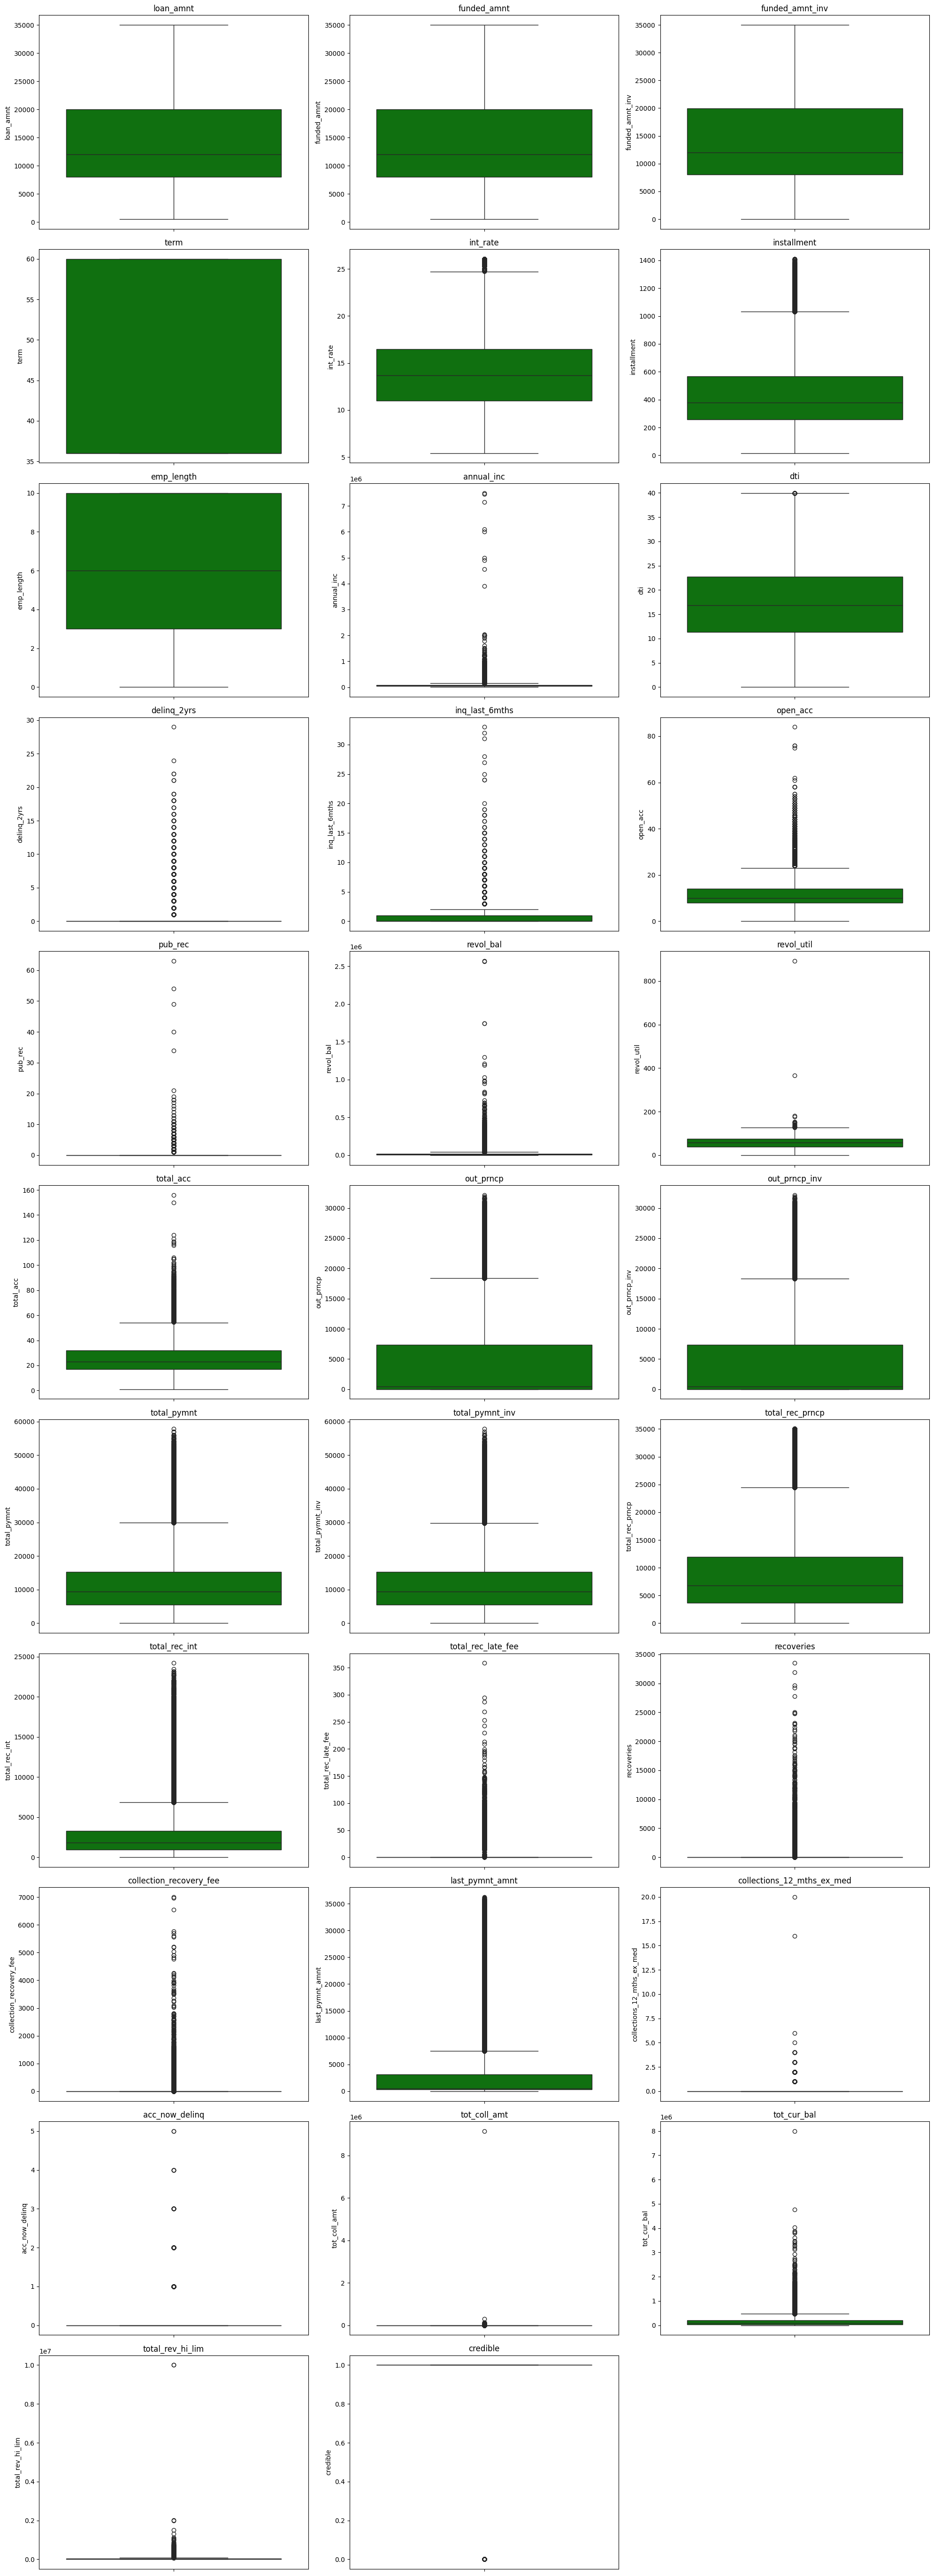

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis on numerical columns and display as tables
# Calculate the number of rows and columns needed for the subplots
num_plots = len(nums)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

# Create the subplots with adjusted grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize as needed

# Flatten the axes array if necessary
axes = axes.flatten()

# Iterate through the numerical columns and create box plots
for i, num_col in enumerate(nums):
    sns.boxplot(y=loan_data[num_col], color='green', orient='v', ax=axes[i])
    axes[i].set_title(num_col)

# Hide any unused subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Univariate Analysis pada nasabah yang layak dan tidak layak

Analisa jumlah nasabah yang layak dan tidak layak

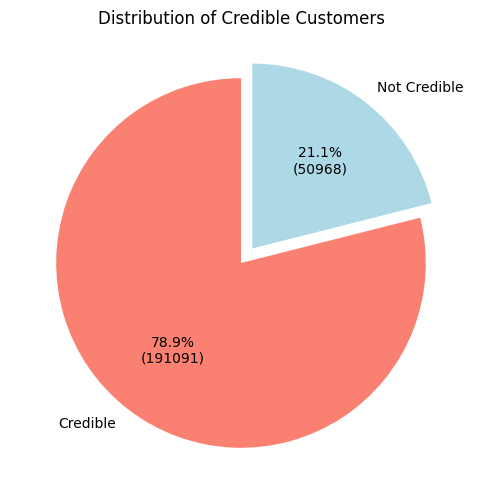

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the binary 'credible' column
credible_counts = loan_data['credible'].value_counts()

# Labels for the pie chart
labels = ['Credible', 'Not Credible']

# Define a function to display percentages and counts
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))  # Calculate count
        return f'{pct:.1f}%\n({count})'         # Format percentage and count
    return my_autopct

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    credible_counts,
    labels=labels,
    autopct=make_autopct(credible_counts),  # Use the custom function
    startangle=90,                         # Rotate the start of the pie chart
    colors=['salmon', 'lightblue'],        # Custom colors
    explode=(0, 0.1)                       # Slightly separate the 'Credible' slice
)

# Add title
plt.title('Distribution of Credible Customers')

# Show the plot
plt.show()



Interpretasi:

Ternyata sebanyak hampir 21% nasabah banyak yang dianggap tidak layak sebanyak 50.968 data. Sedangkan 78.9% atau sekitar 191.091 nasabah dianggap layak diberikan pinjaman

Artinya distribusi data skewed dan perlu dilakukan class imbalance agar tidak bias dengan penilaian layak pada model

Rekomendasi:
Perlu diturunkan  porsi nasabah tidak layak menjadi lebih kecil dari 21% dengan Meminimalkan kemungkinan gagal bayar (default) dengan strategi plafon pinjaman
- Batasi jumlah pinjaman awal untuk nasabah baru dengan profil risiko menengah hingga tinggi
- Naikkan plafon pinjaman secara bertahap berdasarkan rekam jejak pembayaran
- Sediakan pinjaman mikro dengan plafon rendah dan tenor pendek sebagai “uji kelayakan” bagi nasabah dengan risiko tinggi

Sehingga dapat mengurangi beban awal nasabah, sehingga lebih mudah membayar tepat waktu sekaligus membangun track record kredit positif.

## Bivariate Analysis Kelayakan Nasabah dengan Kategori

Top 10 Profesi dengan kelayakan hutang yang baik (1) dan yang kurang baik (0)

In [ ]:
#Make plot of Top 10 Profession group by 1 and 0 from Credible

In [ ]:
# Group by emp_title and credible status, then count
emp_title_counts = loan_data.groupby(['emp_title', 'credible']).size().reset_index(name='count')

# Filter for credible = 1 and get top 10 emp_titles
top_10_credible = (
    emp_title_counts[emp_title_counts['credible'] == 1]
    .sort_values(by='count', ascending=False)
    .head(10)
)

# Filter for credible = 0 and get top 10 emp_titles
top_10_non_credible = (
    emp_title_counts[emp_title_counts['credible'] == 0]
    .sort_values(by='count', ascending=False)
    .head(10)
)

# Display results
print("Top 10 Emp Titles with  Credible = 1:")
print(top_10_credible)

print("\nTop 10 Emp Titles with Not Credible = 0:")
print(top_10_non_credible)

Top 10 Emp Titles with  Credible = 1:
               emp_title  credible  count
105105           Teacher       1.0   1306
64761            Manager       1.0   1221
85757                 RN       1.0    560
87445   Registered Nurse       1.0    559
102913        Supervisor       1.0    530
83741    Project Manager       1.0    477
92007              Sales       1.0    426
75133     Office Manager       1.0    386
110973           US Army       1.0    384
32184           Director       1.0    335

Top 10 Emp Titles with Not Credible = 0:
               emp_title  credible  count
64760            Manager       0.0    431
105104           Teacher       0.0    382
102912        Supervisor       0.0    197
130074           manager       0.0    186
87444   Registered Nurse       0.0    175
85756                 RN       0.0    168
92006              Sales       0.0    153
34234             Driver       0.0    151
125162            driver       0.0    117
76807              Owner       0.0    

<ipython-input-68-8472a5d59a71>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




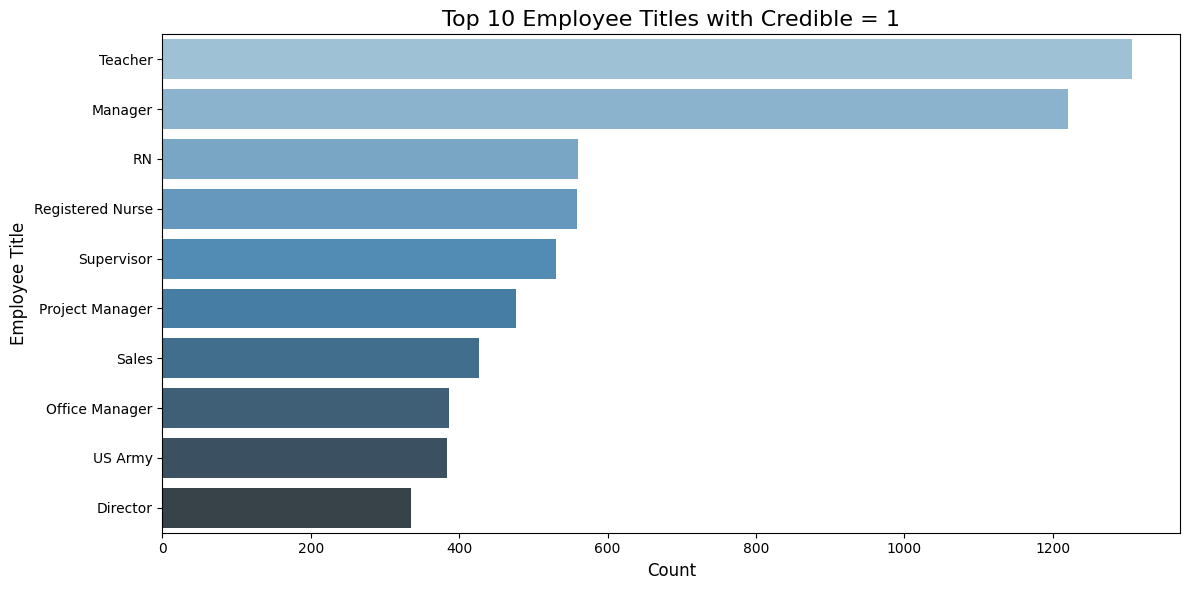

<ipython-input-68-8472a5d59a71>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




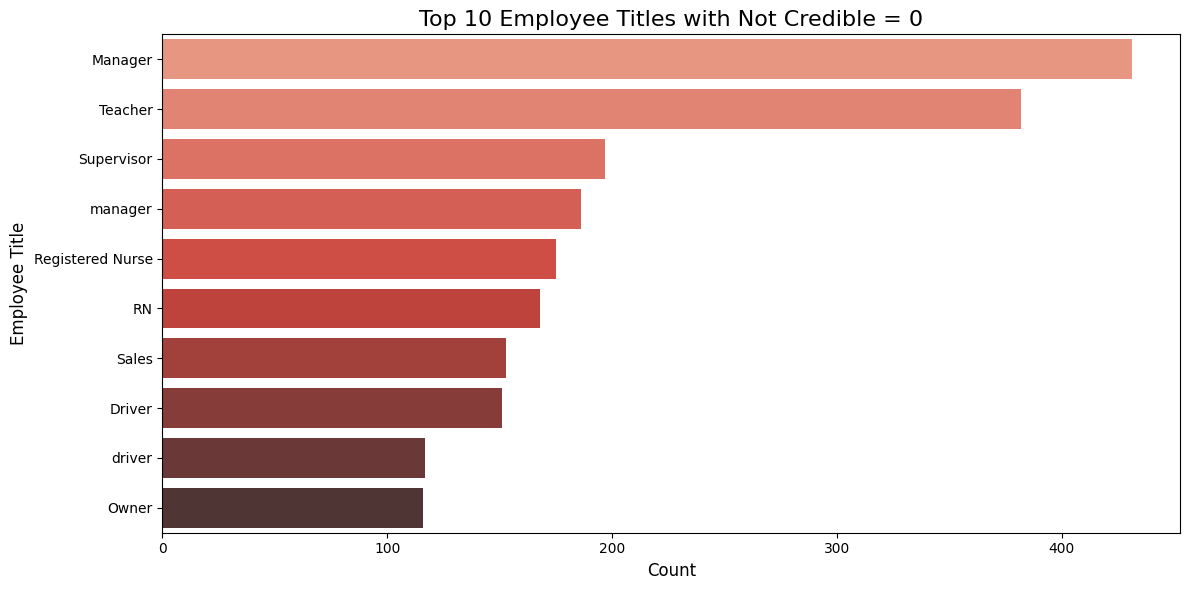

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 credible and non-credible employee titles
top_10_credible = (
    emp_title_counts[emp_title_counts['credible'] == 1]
    .sort_values(by='count', ascending=False)
    .head(10)
)
top_10_non_credible = (
    emp_title_counts[emp_title_counts['credible'] == 0]
    .sort_values(by='count', ascending=False)
    .head(10)
)

# Create bar chart for credible = 1
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_credible,
    x='count',
    y='emp_title',
    palette='Blues_d'
)
plt.title('Top 10 Employee Titles with Credible = 1', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Employee Title', fontsize=12)
plt.tight_layout()
plt.show()

# Create bar chart for credible = 0
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_non_credible,
    x='count',
    y='emp_title',
    palette='Reds_d'
)
plt.title('Top 10 Employee Titles with Not Credible = 0', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Employee Title', fontsize=12)
plt.tight_layout()
plt.show()


Interpretasi:
Dominasi Profesi:

Profesi seperti Guru (1,306), Manager (1,221), dan Perawat terdaftar (1,119 jika digabungkan) memiliki jumlah terbesar dalam kategori credible loans (credible = 1).
Profesi ini cenderung stabil dan memiliki penghasilan tetap yang memungkinkan mereka untuk membayar kembali pinjaman dengan baik.

Pekerjaan seperti Tentara (384) juga menunjukkan kepercayaan pada stabilitas keuangan karena keamanan pekerjaan yang relatif tinggi dalam sektor publik.

Profesi seperti Manager, Teacher, dan Supervisor juga muncul dalam daftar tidak laya tetapi dengan jumlah lebih rendah, menunjukkan bahwa beberapa individu dalam profesi ini menghadapi kesulitan membayar pinjaman

Pekerjaan seperti Driver (268 jika digabungkan) dan Owner (116) juga memiliki tingkat ketidakmampuan yang lebih tinggi dalam membayar pinjaman. Ini mungkin karena sifat pekerjaan yang kurang stabil atau bergantung pada penghasilan tidak tetap.


Rekomendasi:
Dapat dipertimbangkan risk assessment berbasis profesi. Profesi dengan tingkat kredibilitas tinggi seperti Teacher, Registered Nurse, dan Supervisor dapat diberikan penawaran pinjaman yang lebih menarik (misalnya, suku bunga lebih rendah).



Pengaruh home ownership  dengan kelayakan hutang yang baik (1) dan yang kurang baik (0)

In [ ]:
import plotly.express as px

# Filter data to include only credible = 1 and credible = 0, and exclude unwanted values
home_ownership_counts = (
    loan_data[(loan_data['credible'].isin([1, 0])) &
              (loan_data['home_ownership'].notnull()) &
              (~loan_data['home_ownership'].isin(['Any', 'None', 'Other']))]
    .groupby(['home_ownership', 'credible'])
    .size()
    .reset_index(name='count')
)

# Create an interactive bar chart using Plotly
fig = px.bar(
    home_ownership_counts,
    x='home_ownership',
    y='count',
    color='credible',
    barmode='group',
    title='Loan Counts by Home Ownership with Credible Status (1 vs 0)',
    labels={'count': 'Count', 'home_ownership': 'Home Ownership'},
    color_discrete_map={1: 'green', 0: 'red'}  # Custom color map for credibility
)

# Update the chart layout for better aesthetics
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly_white',  # Use a clean, white background template
    xaxis_title='Home Ownership',
    yaxis_title='Count'
)

# Show the chart
fig.show()


Interpretasi:

Sebagian besar data menunjukkan jumlah yang lebih tinggi untuk kategori credible (1) pada jenis kepemilikan rumah ANY, MORTGAGE, dan RENT.
Kategori NONE dan OTHER menunjukkan jumlah yang lebih rendah, dengan kategori OWN memiliki jumlah nasabah yang layak lebih sedikit dibandingkan kategori lainnya.




Besar Bunga dan Jumlah hutang pada nasabah

In [ ]:
# Average 'term', 'int_rate', and 'loan_amnt' and grouped them from credible
loan_data.groupby('credible')[['term', 'int_rate', 'loan_amnt']].mean()


,term,int_rate,loan_amnt
credible,,,
0.0,44.550306,15.973236,14596.853908
1.0,40.452706,13.323055,13233.481169


Interpretasi:
- Term (Jangka Waktu): Nasabah tidak layak rata-rata memiliki jangka waktu pinjaman lebih lama (44.55 bulan) dibandingkan yang layak (40.45 bulan).
- Interest Rate (Tingkat Bunga): Nasabah tidak layak dikenakan bunga rata-rata lebih tinggi (15.97%) dibandingkan nasabah layak (13.32%).
- Loan Amount (Jumlah Pinjaman): Nasabah tidak layak meminjam rata-rata jumlah yang lebih besar (14,596.85) dibandingkan yang layak ($13,233.48).

Hal ini mengindikasikan bahwa nasabah yang mengajukan jumlah pinjaman dalam jangka waktu yang lama, memiliki bunga yang tinggi berpotensi risiko gagal bayar atau nasabah menjadi tidak layak diberikan pinjaman.

Rekomendasi:
- Revisi Kebijakan Pinjaman: Sesuaikan jumlah pinjaman dan jangka waktu untuk nasabah dengan kelayakan rendah.
- Penyesuaian Suku Bunga: Terapkan suku bunga yang lebih tinggi untuk nasabah berisiko dan lebih rendah untuk nasabah layak.
- Pengelolaan Risiko: Analisis faktor-faktor yang menyebabkan nasabah tidak layak memilih jumlah pinjaman besar untuk mengurangi risiko.

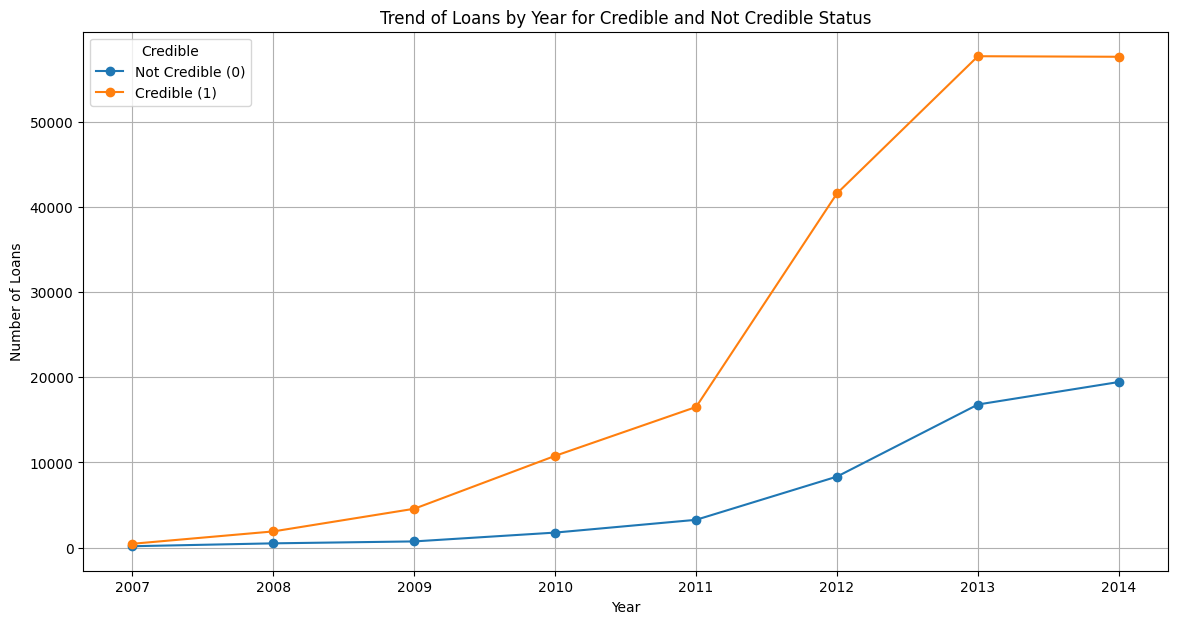

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'loan_data' is your DataFrame
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')   # Convert 'issue_d' to datetime

# Group by year and credibility, and count the number of occurrences for each group
trend_data = loan_data.groupby([loan_data['issue_d'].dt.year, 'credible']).size().unstack(fill_value=0)

# Plot the trend as a line chart
trend_data.plot(kind='line', figsize=(14, 7), marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Trend of Loans by Year for Credible and Not Credible Status')
plt.legend(title='Credible', labels=['Not Credible (0)', 'Credible (1)'])
plt.grid(True)

# Adjust y-axis for a more comprehensive view (e.g., use larger step intervals)
plt.yticks(range(0, trend_data.values.max() + 1, 10000))  # Adjust step (e.g., 10000) as needed
plt.show()


In [ ]:
trend_data

credible,0.0,1.0
issue_d,,
2007,158,445
2008,496,1897
2009,723,4558
2010,1759,10771
2011,3259,16509
2012,8334,41589
2013,16798,57693
2014,19441,57629


Secara umum, jumlah pinjaman mengalami peningkatan signifikan dari tahun ke tahun, terutama pada kategori credible (1.0). Ini menunjukkan bahwa lebih banyak pinjaman disetujui dan dianggap layak seiring berjalannya waktu.

Sementara jumlah pinjaman credible meningkat, jumlah pinjaman dengan status not credible (0.0) juga mengalami peningkatan, tetapi tidak secepat jumlah credible. Jumlah pinjaman not credible meningkat dari 158 pada tahun 2007 menjadi 19,441 pada tahun 2014, yang menunjukkan adanya peningkatan risiko dalam periode tersebut.

Kondisi ekonomi di Amerika Serikat antara 2007-2014 menunjukkan adanya dampak besar dari krisis keuangan global yang menyebabkan banyak peminjam mengalami kesulitan finansial setelah puncak krisis pada tahun 2008-2009

## Bivariate Analysis pada resiko gagal bayar per category dengan credible (Target)

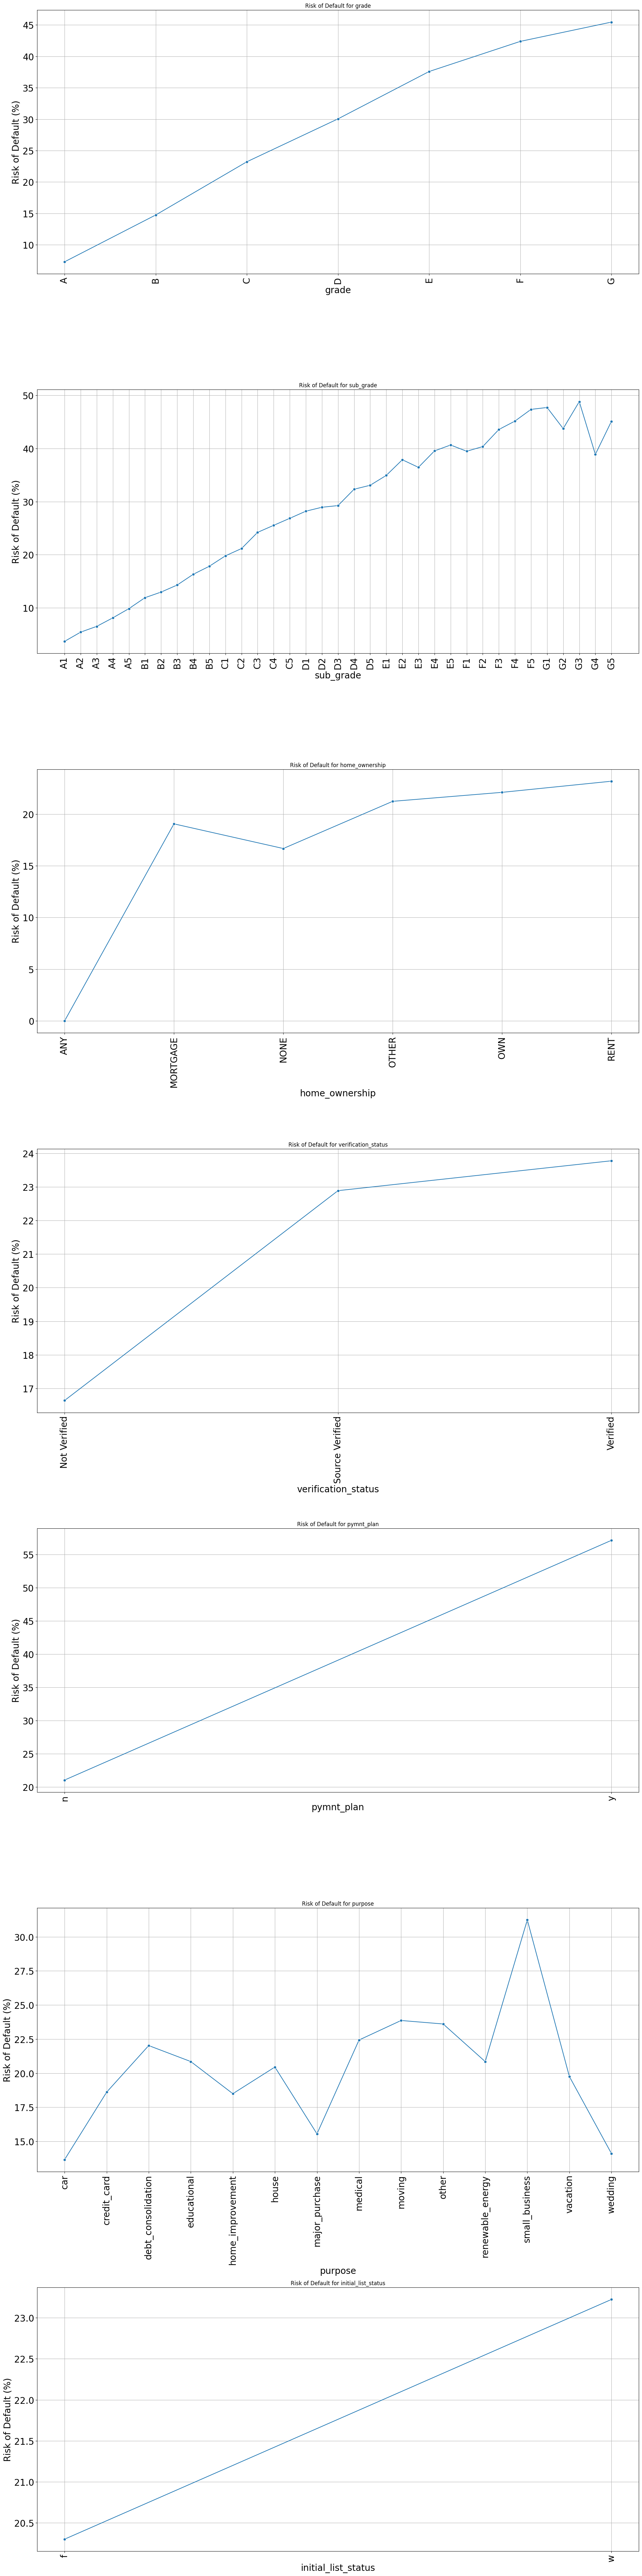

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cats_new = ['grade', 'sub_grade', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose',
       'initial_list_status']

# Set up the figure
plt.figure(figsize=(20, 80))

# Loop through numerical columns to plot the risk of default
for i, col in enumerate(cats_new, 1):
    # Calculate risk of default (credible = 0) for each numerical value
    risk_default = loan_data.groupby(col)['credible'].value_counts(normalize=True).unstack(fill_value=0)[0] * 100

    # Plot the risk of default
    plt.subplot(7, 1, i)
    sns.lineplot(x=risk_default.index, y=risk_default.values, marker='o')
    plt.title(f'Risk of Default for {col}')
    plt.xlabel(col,  fontsize=20)
    plt.ylabel('Risk of Default (%)', fontsize=20)
    plt.xticks(fontsize=20, rotation=90)  # Set x-axis tick font size
    plt.yticks(fontsize=20)
    plt.grid(True)

plt.tight_layout()
plt.show()


## Multivariate Analysis faktor numerikal lain yang mempengaruhi status kelayakan nasabah

In [ ]:
### CORRELATION WITH EACH FEATURES ###

loan_data.corr(numeric_only=True)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credible
loan_amnt,1.000000,0.998548,0.994347,0.412870,0.167183,0.949666,0.120165,0.370893,0.057319,0.006841,-0.020328,0.204182,-0.081137,0.331423,0.117756,0.235262,0.518700,0.518660,0.743841,0.743580,0.612777,0.715876,0.043650,0.110691,0.077336,0.304243,-0.008067,0.006283,-0.002859,0.332686,0.290208,-0.068805
funded_amnt,0.998548,1.000000,0.996125,0.410862,0.167921,0.951787,0.120711,0.370311,0.058673,0.007386,-0.020970,0.204983,-0.080593,0.331039,0.118885,0.235135,0.521451,0.521412,0.743363,0.743441,0.612318,0.715664,0.043350,0.110338,0.077190,0.304178,-0.007822,0.006472,-0.002859,0.332683,0.290206,-0.068989
funded_amnt_inv,0.994347,0.996125,1.000000,0.412005,0.169353,0.947387,0.123738,0.367806,0.062606,0.008143,-0.027580,0.205807,-0.078894,0.327436,0.120774,0.235456,0.525143,0.525115,0.738037,0.745460,0.607027,0.713460,0.038985,0.107944,0.073781,0.303105,-0.007175,0.006801,-0.002858,0.332677,0.290185,-0.066595
term,0.412870,0.410862,0.412005,1.000000,0.443395,0.159631,0.080978,0.069949,0.091912,0.004135,0.009975,0.077714,-0.022790,0.092577,0.084145,0.101324,0.434307,0.434273,0.174923,0.177328,0.009798,0.534333,0.011915,0.090019,0.055900,0.111597,0.000357,0.007724,-0.001775,0.119444,0.061435,-0.167635
int_rate,0.167183,0.167921,0.169353,0.443395,1.000000,0.148790,0.030449,-0.046072,0.159657,0.079190,0.205641,0.012307,0.066695,-0.004589,0.323365,-0.033012,0.137427,0.137451,0.127035,0.129166,-0.032130,0.485154,0.057875,0.127893,0.082198,0.075609,0.020306,0.030338,0.000863,-0.097316,-0.146838,-0.246338
installment,0.949666,0.951787,0.947387,0.159631,0.148790,1.000000,0.104662,0.368145,0.049919,0.017001,0.002247,0.196839,-0.070093,0.320239,0.136852,0.215906,0.408838,0.408811,0.764360,0.763895,0.663399,0.641948,0.052341,0.105666,0.075344,0.299867,-0.006055,0.008923,-0.002359,0.300639,0.270074,-0.050599
emp_length,0.120165,0.120711,0.123738,0.080978,0.030449,0.104662,1.000000,0.073876,0.049942,0.030338,-0.016409,0.042534,0.039361,0.091619,0.044498,0.114056,0.087146,0.087147,0.079715,0.083409,0.058486,0.097812,-0.011843,0.006991,0.004765,0.037878,-0.000251,0.009875,-0.001617,0.096538,0.068100,-0.003917
annual_inc,0.370893,0.370311,0.367806,0.069949,-0.046072,0.368145,0.073876,1.000000,-0.188548,0.058896,0.056675,0.157784,-0.015439,0.332316,0.037582,0.224690,0.168316,0.168316,0.299784,0.298728,0.275823,0.212951,0.020273,0.016954,0.013680,0.142155,-0.000445,0.017133,0.001895,0.486086,0.291955,0.060975
dti,0.057319,0.058673,0.062606,0.091912,0.159657,0.049919,0.049942,-0.188548,1.000000,-0.003694,-0.012541,0.303914,-0.046192,0.143380,0.200412,0.228221,0.119984,0.119972,-0.026007,-0.021788,-0.063895,0.089582,-0.005747,0.021462,0.018084,-0.043068,0.000308,0.009491,-0.003560,-0.018384,0.060972,-0.122388
delinq_2yrs,0.006841,0.007386,0.008143,0.004135,0.079190,0.017001,0.030338,0.058896,-0.003694,1.000000,0.017985,0.059134,-0.010810,-0.031121,-0.013183,0.130793,0.043857,0.043852,-0.019697,-0.018993,-0.032098,0.024274,0.024428,0.004484,0.005382,-0.013740,0.039147,0.126532,0.000072,0.072699,-0.035028,-0.025835


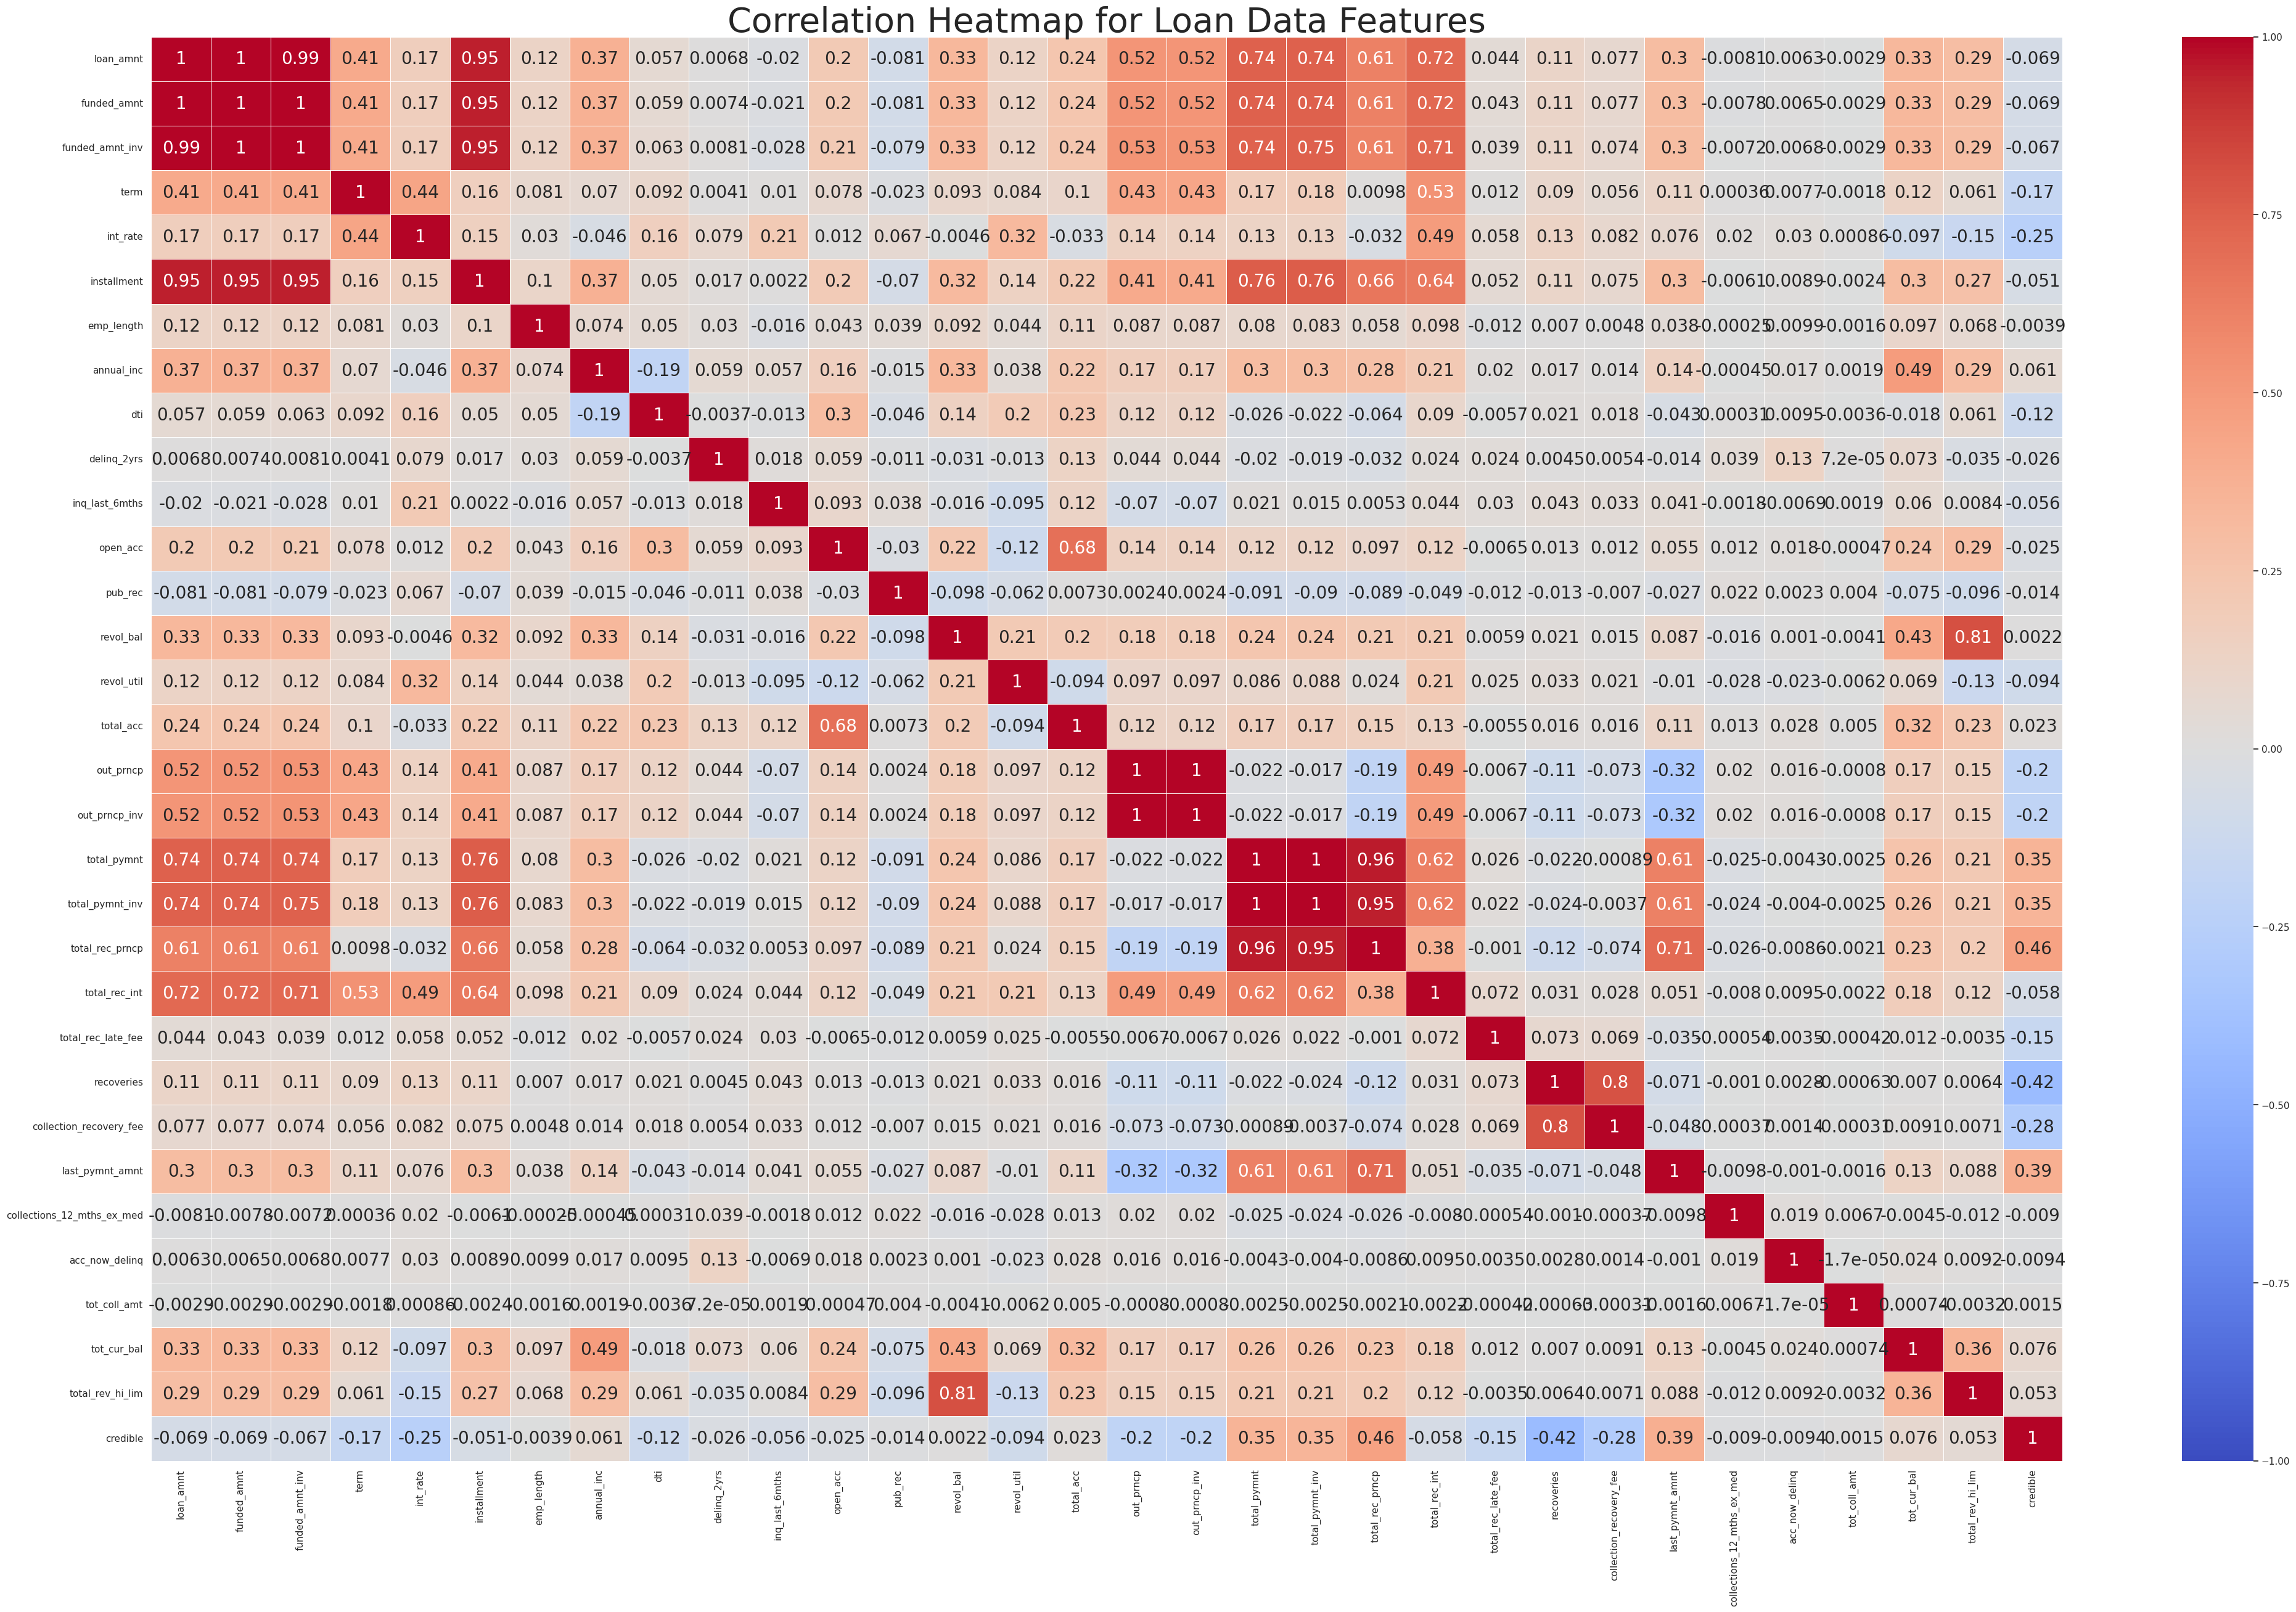

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
loan_corr = loan_data.corr(numeric_only=True)  # or use df_europe.select_dtypes(include=['number']).corr()

# Set up the figure size and aesthetic
plt.figure(figsize=(50, 30))
sns.set_theme(style="whitegrid")

# Create a heatmap
heatmap = sns.heatmap(loan_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1,  annot_kws={"size": 20})

# Add title
plt.title('Correlation Heatmap for Loan Data Features', fontsize=40)

# Display the plot
plt.show()

# Additional Data Cleansing

In [ ]:
loan_clean = loan_data.copy()

In [ ]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   466285 non-null  int64         
 1   funded_amnt                 466285 non-null  int64         
 2   funded_amnt_inv             466285 non-null  float64       
 3   term                        466285 non-null  int64         
 4   int_rate                    466285 non-null  float64       
 5   installment                 466285 non-null  float64       
 6   grade                       466285 non-null  object        
 7   sub_grade                   466285 non-null  object        
 8   emp_title                   438697 non-null  object        
 9   emp_length                  445277 non-null  float64       
 10  home_ownership              466285 non-null  object        
 11  annual_inc                  466281 non-

Setelah di lakukan EDA, kolom yang tidak relevan untuk dijadikan fitur sebaiknya dihapus dengan kategori
- Banyak unique values (emp_title dan emp_length)
- Similiaritas dengan kolom lain (sub-grade)
- Tanggal dan waktu yang tidak berkaitan, karena model yang akan di bangun tidak bergantung pada waktu (issue_d, last_pymnt_d, last_credit_pull_d, next_pymnt_d)
- didominasi oleh 1 data (pymnt_plan)



In [ ]:
#Remove unecessary column
loan_clean = loan_clean.drop(['emp_title', 'emp_length', 'sub_grade', 'issue_d', 'earliest_cr_line', 'last_pymnt_d','pymnt_plan', 'last_credit_pull_d', 'next_pymnt_d'], axis=1)

Membuang fitur yang redundan

In [ ]:
#Find columns with correlation above 0.7 Except total_pymnt and last_pymnt_amnt

corr_matrix = loan_data.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]


print("Columns to be dropped based on correlation:")
print(to_drop)


Columns to be dropped based on correlation:
['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rev_hi_lim']


In [ ]:
#Drop the highly corelated columns excluce total_pymnt and last_pymnt_amnt
to_drop = [column for column in upper.columns if any(upper[column] > 0.7) and column not in ['total_pymnt', 'last_pymnt_amnt']]
loan_clean = loan_clean.drop(to_drop, axis=1)

In [ ]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  int64  
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   home_ownership              466285 non-null  object 
 5   annual_inc                  466281 non-null  float64
 6   verification_status         466285 non-null  object 
 7   loan_status                 466285 non-null  object 
 8   purpose                     466285 non-null  object 
 9   zip_code                    466285 non-null  object 
 10  addr_state                  466285 non-null  object 
 11  dti                         466285 non-null  float64
 12  delinq_2yrs                 466256 non-null  float64
 13  inq_last_6mths

# Handling Missing Values

In [ ]:
#Count missing values each columns
loan_clean.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
home_ownership,0
annual_inc,4
verification_status,0
loan_status,0
purpose,0
zip_code,0


Baris yang mengandung missing value berlebih dihapus untuk tetap mempertahankan keaslian data

In [ ]:
#Delete Excessive Rows Values
loans = loan_clean.dropna()

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175256 entries, 42538 to 466283
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   175256 non-null  int64  
 1   term                        175256 non-null  int64  
 2   int_rate                    175256 non-null  float64
 3   grade                       175256 non-null  object 
 4   home_ownership              175256 non-null  object 
 5   annual_inc                  175256 non-null  float64
 6   verification_status         175256 non-null  object 
 7   loan_status                 175256 non-null  object 
 8   purpose                     175256 non-null  object 
 9   zip_code                    175256 non-null  object 
 10  addr_state                  175256 non-null  object 
 11  dti                         175256 non-null  float64
 12  delinq_2yrs                 175256 non-null  float64
 13  inq_last_6mths 

In [ ]:
#Import data to csv
loans_bo = loans.copy()
loans_bo.to_csv('loans_bo.csv', index=False)

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)


In [ ]:
#count pub_rec
loans['pub_rec'].value_counts()


,count
pub_rec,
0.0,150220
1.0,22006
2.0,2127
3.0,566
4.0,178
5.0,84
6.0,41
7.0,16
9.0,6


# Handling Outliers

Outliers di biarkan saja karena kebanyakan data numerikal berbentuk angka yang pilihan kategori

In [ ]:
#Create numerical from int64 and float
nums = loans.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Univariate Analysis on numerical columns and display as tables
# Calculate the number of rows and columns needed for the subplots
num_plots = len(nums)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

# Create the subplots with adjusted grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

# Flatten the axes array if necessary
axes = axes.flatten()

# Iterate through the numerical columns and create box plots
for i, num_col in enumerate(nums):
    sns.boxplot(y=loans[num_col], color='green', orient='v', ax=axes[i])
    axes[i].set_title(num_col)

# Hide any unused subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Print value of rows after outlier handling
loans.info()

### Drop duplicates

In [ ]:
loan_duplicates = len(loan_data)-len(loan_data.drop_duplicates())
print('total duplicates data =', loan_duplicates)

# Cek ulang korelasi antar fitur dan target

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
loans_corr = loans.corr(numeric_only=True)  # or use df_europe.select_dtypes(include=['number']).corr()

# Set up the figure size and aesthetic
plt.figure(figsize=(50, 30))
sns.set_theme(style="whitegrid")

# Create a heatmap
heatmap = sns.heatmap(loans_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1,  annot_kws={"size": 20})

# Add title
plt.title('Correlation Heatmap for Loans Features', fontsize=40)

# Display the plot
plt.show()

In [ ]:
#import loans to csv
loans.to_csv('loans.csv', index=False)